<h1 align = "center"> Nuclear Hot Spots: An Analysis of Nuclear Powerplant Placement in the United States

<br>
<br>
<h4 align = "center"> Shaila Sundram
<br>
<br>
Final Project – Proposal Presentation
<br>
<br>
PPOL564 | Data Science 1
</h4>





In [12]:
#Document Prep
import requests
import re
import time # To put the system to sleep
import random # for random numbers
from bs4 import BeautifulSoup # For parsing the website
import country_converter as coco
import sqlite3
import seaborn as sns
sns.set(style="darkgrid")

# Data Management/Investigation
import pandas as pd
pd.options.mode.chained_assignment = None
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Plotting libraries
from plotnine import *
import matplotlib.pyplot as plt


# Misc
import warnings
warnings.filterwarnings("ignore")

<table border="1">
<h2 align = "left"> Problem Statement: </h2>
<br>
<br>
Nuclear powerplant placement is an increasingly controversial topic, as risk factors to the surrounding areas (agricultural, environmental) have become increasingly apparent.
    
By analyzing county-level data, I hope to model nuclear powerplant placement in the United States and uncover common risk factors across locations.
<br>
<br>
<br>

<table border="1">
<h2 align = "left"> Background I: History and Applications </h2>
<tr>
    <img src="chernobyl.png" width="500" align = "right">
 </tr>
 <tr>
 </tr>
<br>
<br>
<br>
<br>
<br>
<br>
&#9679; Effects of nuclear contamination on crops and food supply is now more widely researched and apparent
<br>
<br>
&#9679; Concerns are rising around increased extreme weather events and vulnerability of power plants
<br>
<br>
&#9679; Lowering risk of nuclear power can help improve public perception of it as a low-cost, zero-carbon energy source
<br>
<br>

<table border="1">
<h2 align = "left"> Background II: Data Available </h2>
<br>
<br>
<tr>
    <img src="cropsite.png" width="500" align = "right">
 </tr>
 <tr>
 </tr>
<br>
<br>
<br>
<br>
<br>
<br>
&#9679; Locations of U.S. Nuclear Power Plants (longitude/latitude).
<br>
<br>
&#9679; USDA Crop production by zip code
<br>
<br>
&#9679; Mapping of zip code to longitude/latitude to county
<br>
<br>    
&#9679; U.S. Census Directory of zip codes, counties, population, and density 
<br>
<br>
&#9679; Weather and health data by county

<table border="1">
<h2 align = "left"> Methods Considered </h2>
<br>
<br>
<tr>
    <img src="worldnuke.png" width="700" align = "right">
 </tr>
 <tr>
 </tr>
<br>
<br>
<br>
<br>
<br>
<br>
&#9679; Limitting to agricultural data 
<br>
<br>
&#9679; Analyzing powerplant placement on a global scale
<br>
<br>
&#9679; Using longitude/latitude or zip code for basis of analysis
<br>
<br>    

<table border="1">
<h2 align = "left"> Methods Used </h2>
<br>
<br>
<tr>
    <img src="plot.png" width="700" align = "right">
 </tr>
 <tr>
 </tr>
<br>
<br>
<br>
<br>
&#9679; Web scraping - directly gather data
<br>
<br>
&#9679; Data wrangling in Python (Pandas, Numpy, etc.) and SQL - standardize unit of analysis
<br>
<br>
&#9679; Data visualization in Python and R - create a range of visuals
<br>
<br>
&#9679; SKlearn - create a predictive model
<br>    

<table border="1">
<h2 align = "left"> Results 1: Wrangled Data </h2>
<br>
<br>
<tr>
    <img src="sql.png" width="800" align = "right">
 </tr>
 <tr>
 </tr>
<br>
<br>
<br>
<br>
&#9679; Compiled data using pandas and SQL to organize by county
<br>
<br>
&#9679; Standardized to county level data
<br>
<br>
&#9679; Some gaps in climate data (not taken over time)
<br>
<br>
<br>    

<table border="1">
<h2 align = "left"> Results 2: Visual Learnings </h2>
<tr>
    <img src="maps.png" width="600" align = "right">
 </tr>
 <tr>
 </tr>
<br>
<br>
<br>
<br>
&#9679; Visually, we can see nuclear reactor placement does not avoid agricultural hubs (rendered in R)
<br>
<br>
&#9679; Crop Production tends to occur in certain climate (not harsh)
<br>
<br>
&#9679; Climate, elevation, or population characteristics may be better indicators
<br>
<br>
<br>    

<table border="1">
<h2 align = "left"> Results 3: Predictive Model </h2>
<br>
<br>
<tr>
    <img src="factors.png" width="500" align = "right">
    <img src="res.png" width="500" align = "right">
 </tr>
 <tr>
 </tr>
<br>
<br>
<br>
<br>
&#9679; Predictive Model currently at 69% 
<br>
<br>
&#9679; Random forrest classifier was the best model fit
<br>
<br>
&#9679; Weather related factors are currently the best predictors of location
<br>
<br>
<br>   

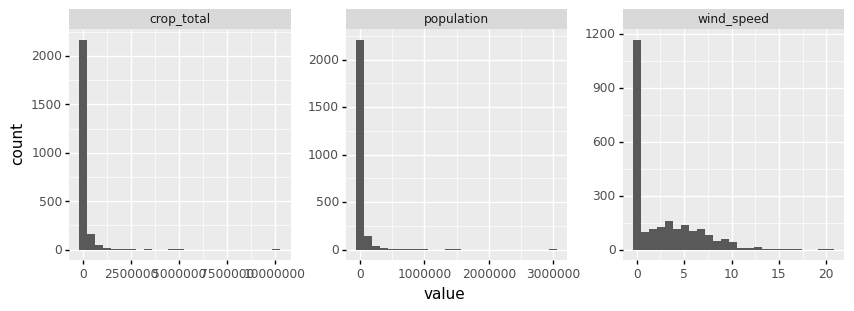

<ggplot: (324413880)>

In [19]:
dat2 = pd.read_csv("dat2.csv")
dat2 = dat2.fillna(0)

#re-split new data
y = dat2[['Reactor_Area']]
X = dat2.drop(columns=['Reactor_Area'])

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=202011)

d = train_X.select_dtypes(include="float").melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)

<table border="1">
<h2 align = "left"> Lessons Learned 1: Challenges </h2>
<br>
<br>
<tr>
    <img src="miss2.png" width="800" align = "right">
 </tr>
 <tr>
 </tr>
<br>
<br>
<br>
<br>
&#9679; Aggregating data (long/lat->zipcode->county)
<br>
<br>
&#9679; Graphical data visualization
<br>
<br>
&#9679; Variable inconsistencies
<br>
<br>
<br>   

<table border="1">
<h2 align = "left"> Lessons Learned 2: Next Steps </h2>
<br>
<br>
<tr>
    <img src="pre.png" width="1000" align = "right">
 </tr>
 </tr>
 </tr>
<br>
<br>
<br>
<br>
&#9679; Overlay graph data to make it more meaningful
<br>
<br>
&#9679; Fill in gaps in data set
<br>
<br>
&#9679; Preprocessing of variables to better predict outcomes
<br>
<br>
<br>   